### Lobster Peer-graded Assignment

Your assignment is to submit three models that each improve upon the last as far as the lift attained at 20%. For example: (1) a simple model that isn't so great, (2) a better model, and then (3) the best model you could come up with. For each, you'll briefly describe the model and submit a screenshot of the gains curve.

Each model must involve at least two independent variables -- and yet be different from the example two-variable model shown in the previous video -- and the last of your three models must incorporate at least five independent variables.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("Lobster data - Lobster data.csv")

In [3]:
df

,ID,spend,email,source,freeship,corn,eastofmiss,repeatorder
0,9999617,205,corporate,direct,0,0,1,1
1,9999181,147,corporate,referral,1,1,0,1
2,9999160,193,popular,direct,1,0,1,0
3,9998919,65,other,referral,0,0,0,0
4,9997874,29,other,search,1,0,1,0
...,...,...,...,...,...,...,...,...
9995,4116,70,corporate,direct,1,1,0,1
9996,2680,166,corporate,referral,0,1,1,0
9997,1787,187,other,search,0,0,0,0
9998,897,82,corporate,search,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   spend        10000 non-null  int64 
 2   email        10000 non-null  object
 3   source       10000 non-null  object
 4   freeship     10000 non-null  int64 
 5   corn         10000 non-null  int64 
 6   eastofmiss   10000 non-null  int64 
 7   repeatorder  10000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 625.1+ KB


In [5]:
df.describe(include='all')

,ID,spend,email,source,freeship,corn,eastofmiss,repeatorder
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,3,NaN,NaN,NaN,NaN
top,NaN,NaN,other,direct,NaN,NaN,NaN,NaN
freq,NaN,NaN,3409,3392,NaN,NaN,NaN,NaN
mean,4.986327e+06,118.880600,NaN,NaN,0.505700,0.500200,0.495200,0.255300
std,2.884974e+06,58.039929,NaN,NaN,0.499993,0.500025,0.500002,0.436052
min,1.460000e+02,20.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.493309e+06,68.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,4.958632e+06,118.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000
75%,7.457714e+06,170.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000


In [6]:
df.shape

(10000, 8)

In [7]:
df.columns

Index(['ID', 'spend', 'email', 'source', 'freeship', 'corn', 'eastofmiss', 'repeatorder'], dtype='object')

### Data Visualization

### Univariate Data Exploration

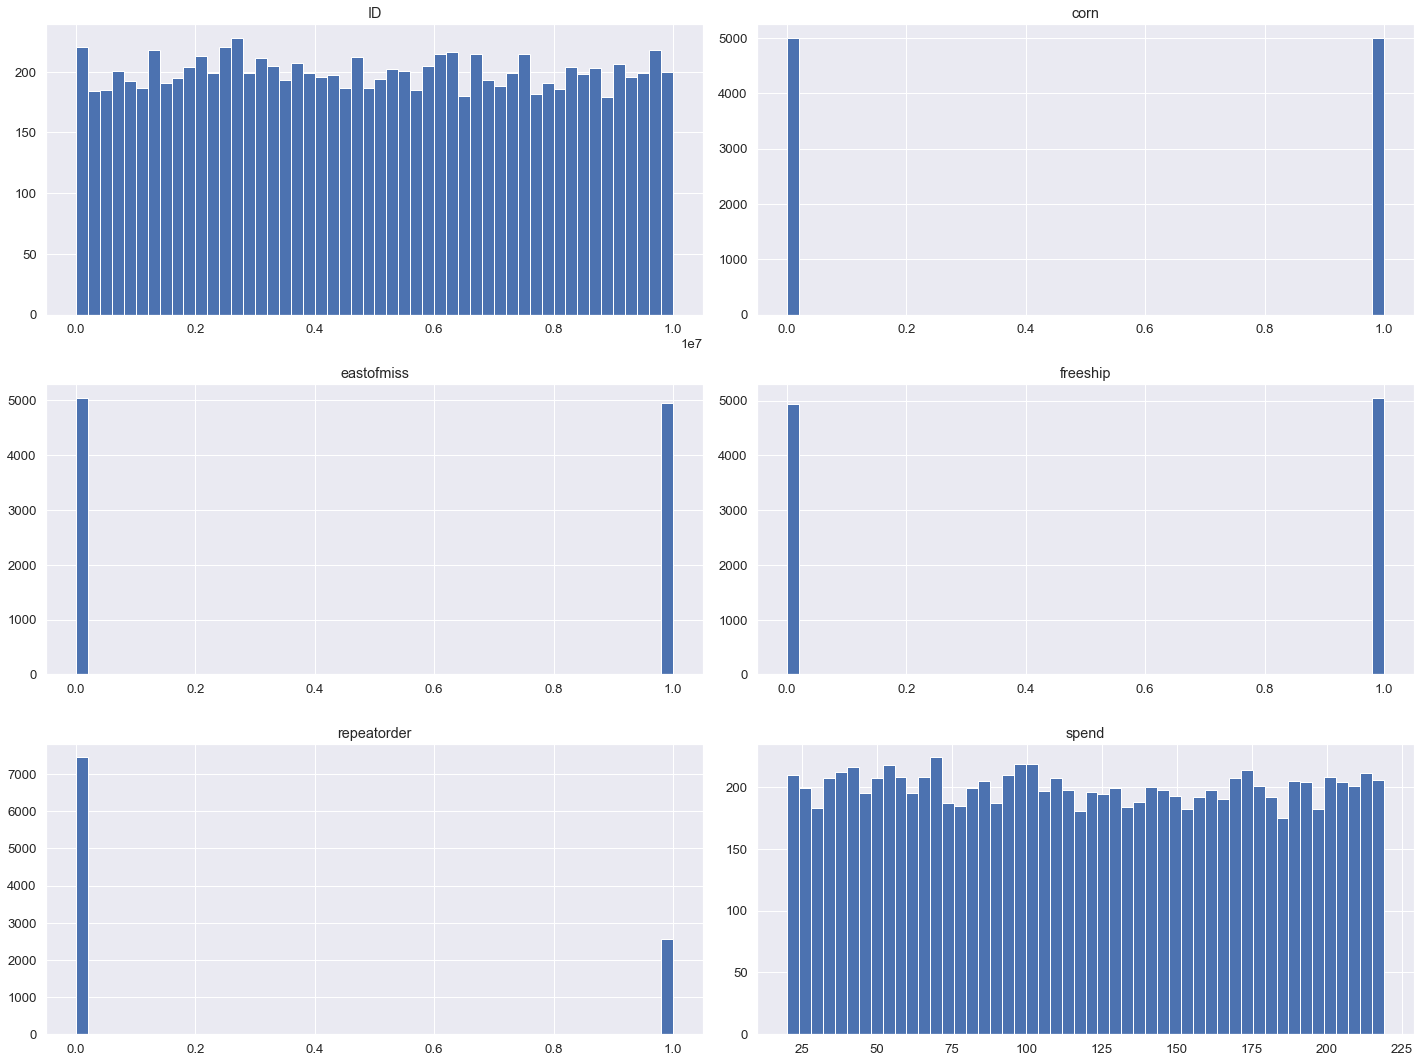

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

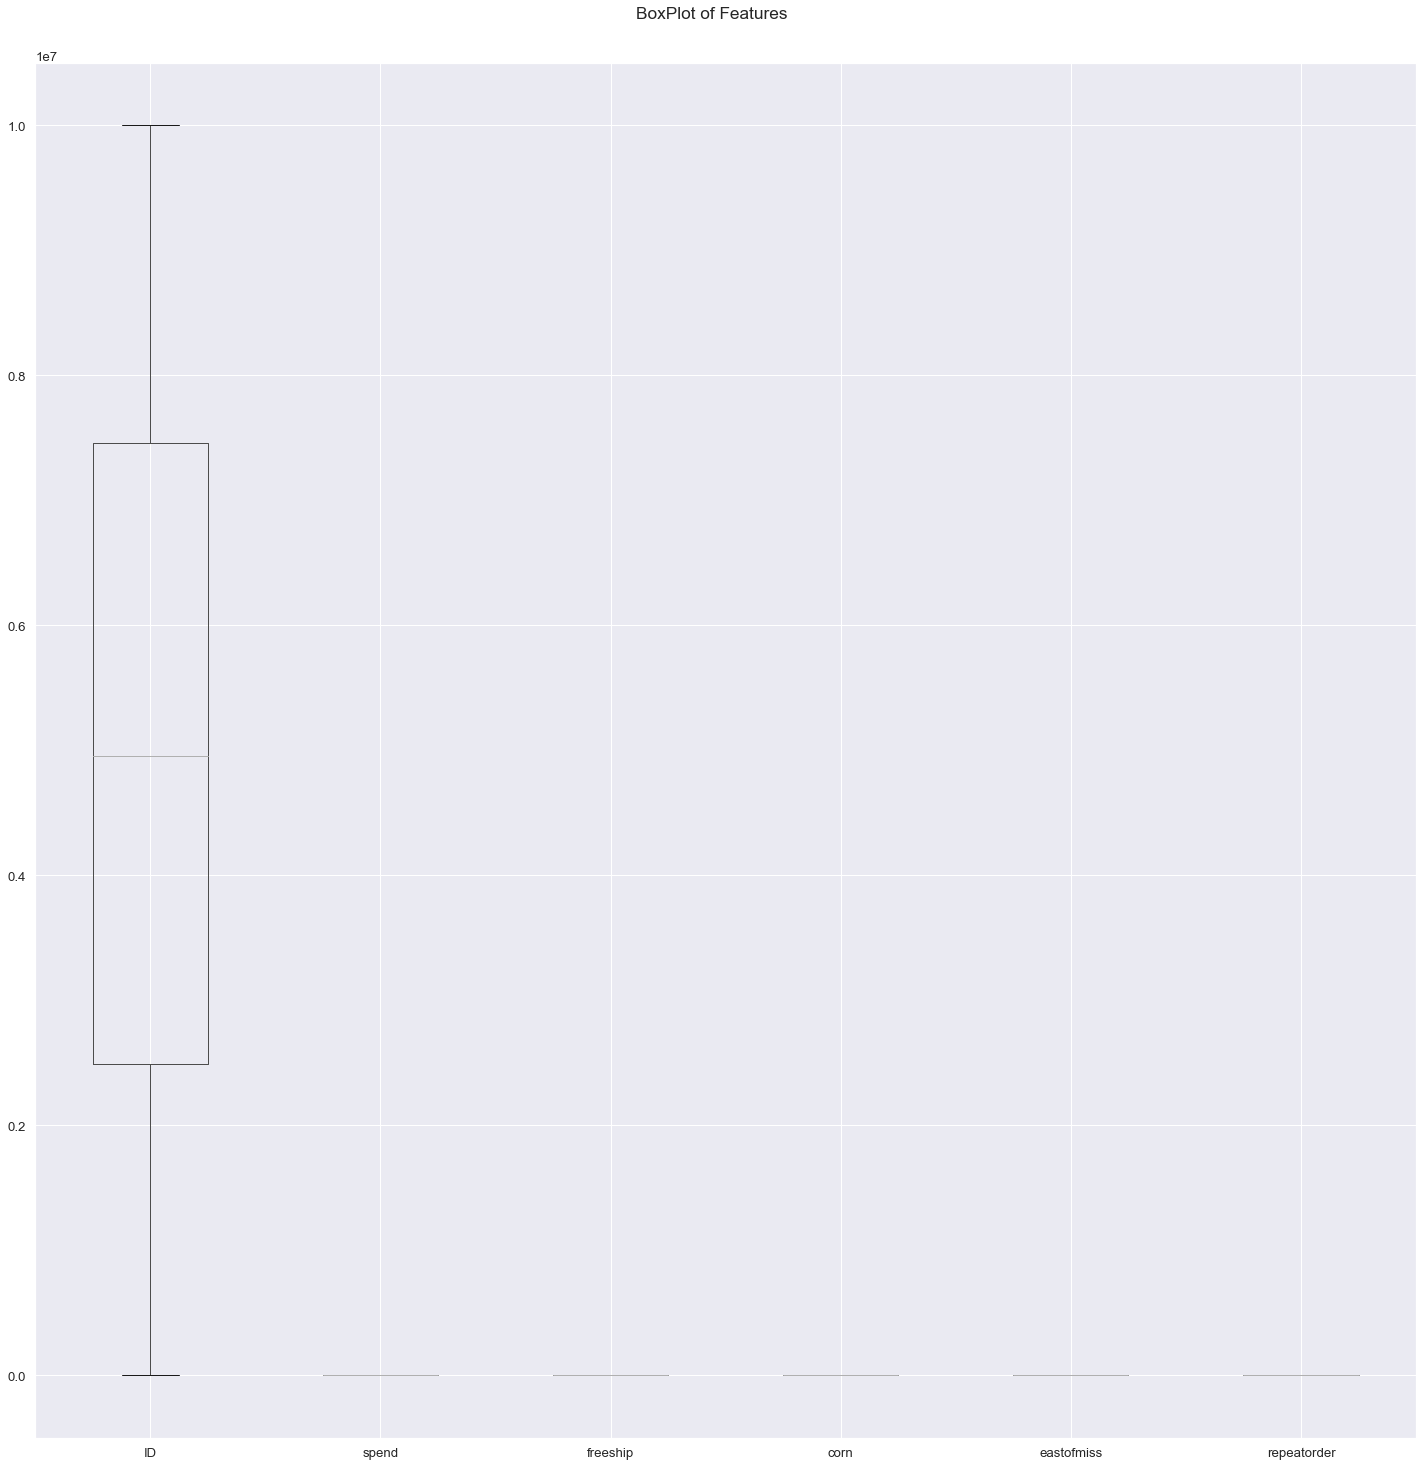

In [9]:
df.boxplot(figsize=(20,20))

plt.suptitle('BoxPlot of Features', x=0.5, y=1.02, ha='center', fontsize='large')

plt.tight_layout()

plt.show()

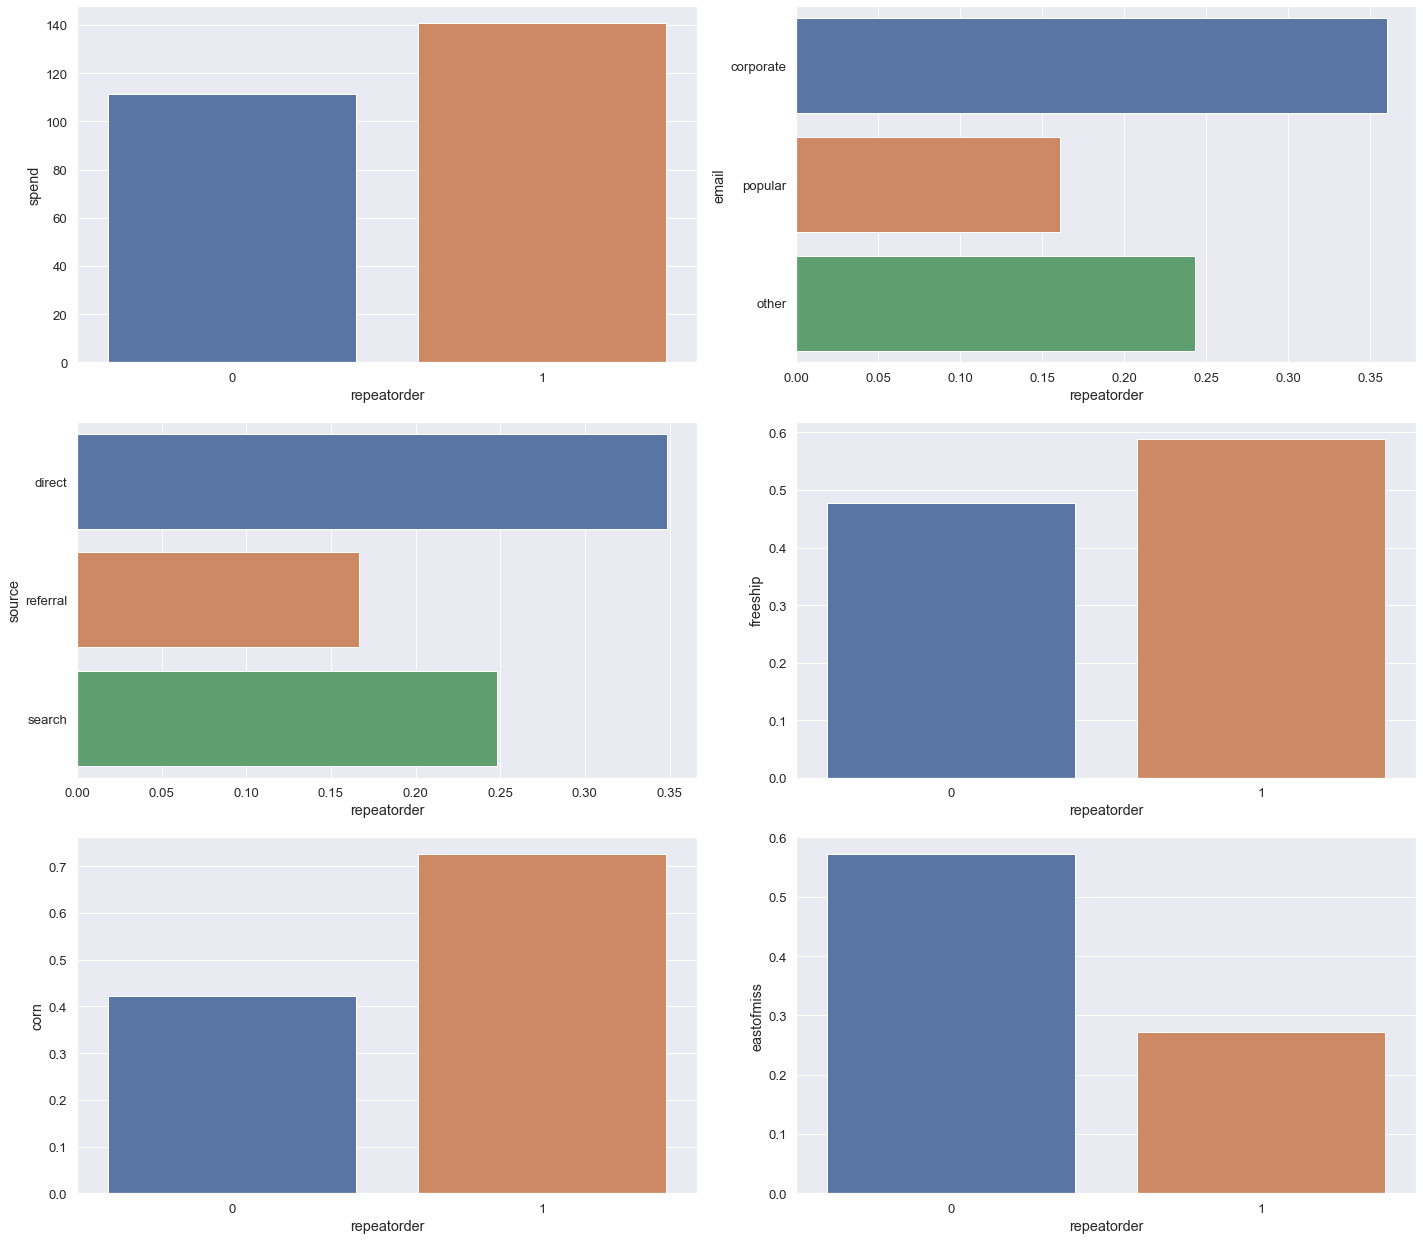

In [10]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
sns.barplot(x="repeatorder", y="spend", data=df, ci=None)

plt.subplot(7,2,2)
plt.title("")
sns.barplot(x="repeatorder", y="email", data=df, ci=None)

plt.subplot(7,2,3)
plt.title("")
sns.barplot(x="repeatorder", y="source", data=df, ci=None)

plt.subplot(7,2,4)
plt.title("")
sns.barplot(x="repeatorder", y="freeship", data=df, ci=None)

plt.subplot(7,2,5)
plt.title("")
sns.barplot(x="repeatorder", y="corn", data=df, ci=None)

plt.subplot(7,2,6)
plt.title("")
sns.barplot(x="repeatorder", y="eastofmiss", data=df, ci=None)

plt.tight_layout()
plt.show()

### Analysis of graphs

1. Higher spenders giving high repeat orders
2. Mainly corporate customers do orders
3. Orders are done directly from company website
4. Orders come with free shipping first time are higher
5. Orders are higher if corn are included as side dish
6. Orders are lower for East side of Mississippi River

### Correlation

In [11]:
df.corr()

,ID,spend,freeship,corn,eastofmiss,repeatorder
ID,1.000000,-0.014103,0.007470,-0.002363,0.000851,-0.004069
spend,-0.014103,1.000000,0.000130,-0.006919,-0.010806,0.220051
freeship,0.007470,0.000130,1.000000,-0.017006,0.007510,0.097682
corn,-0.002363,-0.006919,-0.017006,1.000000,-0.009597,0.264197
eastofmiss,0.000851,-0.010806,0.007510,-0.009597,1.000000,-0.262033
repeatorder,-0.004069,0.220051,0.097682,0.264197,-0.262033,1.000000


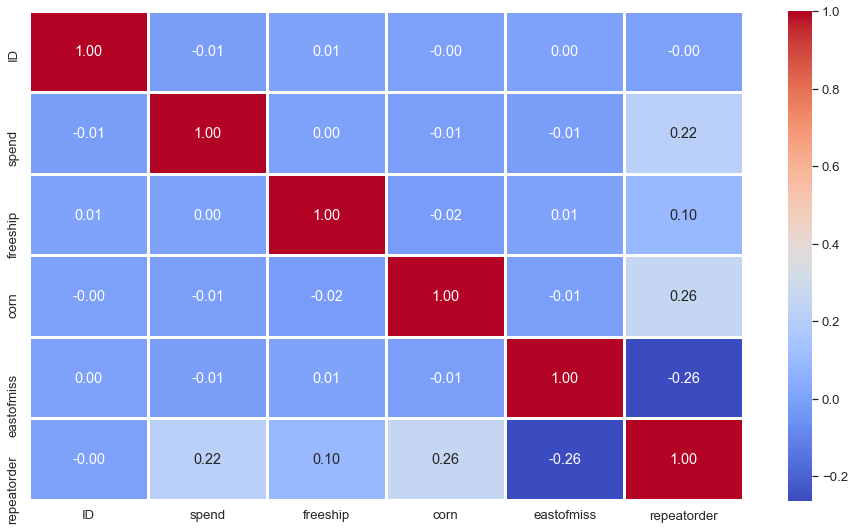

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

Result: Variables are uncorrelated to each other

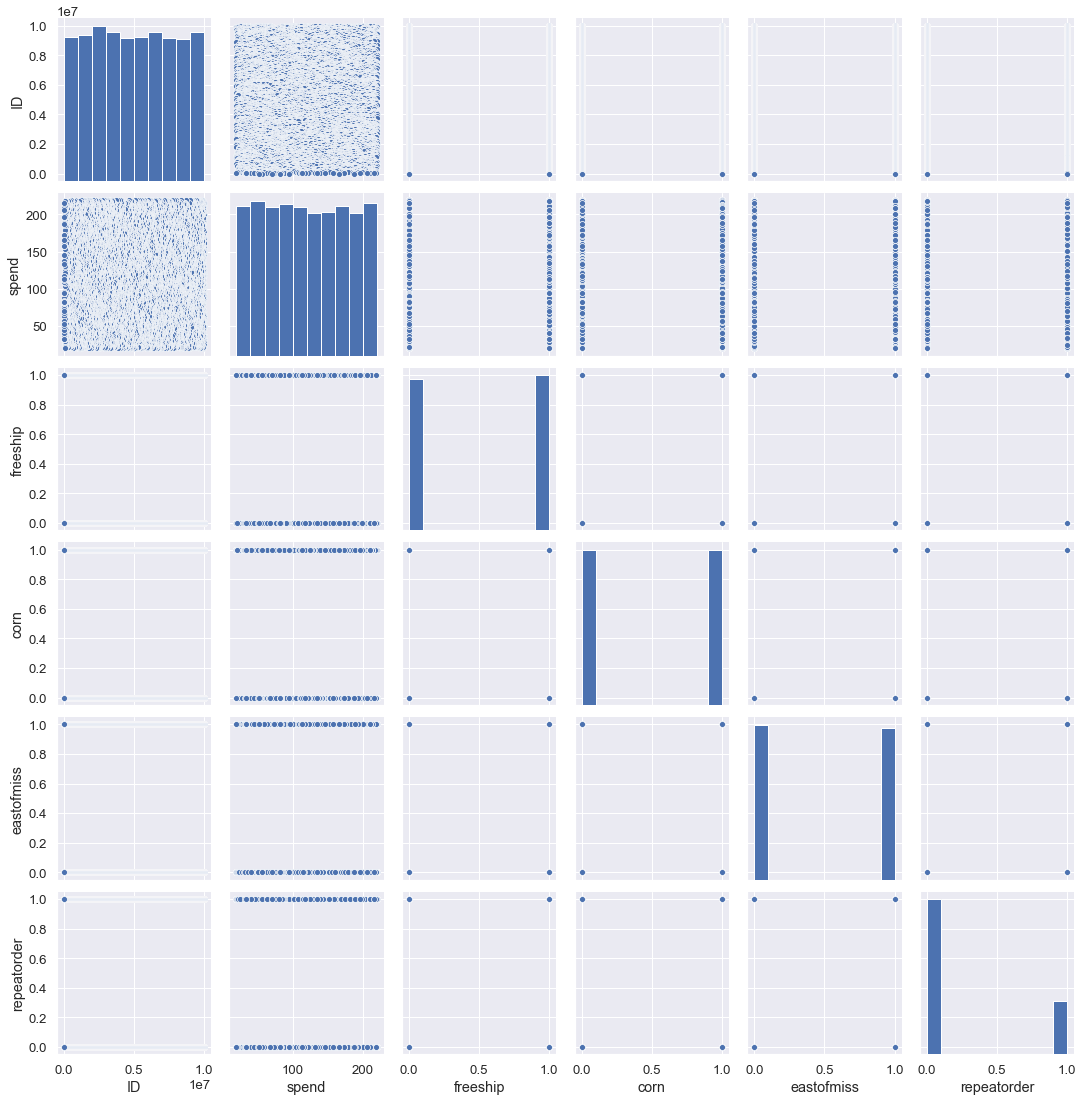

In [13]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [14]:
df.isnull().sum()

ID             0
spend          0
email          0
source         0
freeship       0
corn           0
eastofmiss     0
repeatorder    0
dtype: int64

### Treat Duplicate Values

In [15]:
df.duplicated(keep='first').sum()

0

### Perform One-Hot Encoding

In [16]:
df.drop(['ID'],axis=1,inplace=True)

In [17]:
df

,spend,email,source,freeship,corn,eastofmiss,repeatorder
0,205,corporate,direct,0,0,1,1
1,147,corporate,referral,1,1,0,1
2,193,popular,direct,1,0,1,0
3,65,other,referral,0,0,0,0
4,29,other,search,1,0,1,0
...,...,...,...,...,...,...,...
9995,70,corporate,direct,1,1,0,1
9996,166,corporate,referral,0,1,1,0
9997,187,other,search,0,0,0,0
9998,82,corporate,search,0,0,0,0


In [18]:
df1 = pd.get_dummies(df, drop_first=True)

In [19]:
df1

,spend,freeship,corn,eastofmiss,repeatorder,email_other,email_popular,source_referral,source_search
0,205,0,0,1,1,0,0,0,0
1,147,1,1,0,1,0,0,1,0
2,193,1,0,1,0,0,1,0,0
3,65,0,0,0,0,1,0,1,0
4,29,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
9995,70,1,1,0,1,0,0,0,0
9996,166,0,1,1,0,0,0,1,0
9997,187,0,0,0,0,1,0,0,1
9998,82,0,0,0,0,0,0,0,1


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   spend            10000 non-null  int64
 1   freeship         10000 non-null  int64
 2   corn             10000 non-null  int64
 3   eastofmiss       10000 non-null  int64
 4   repeatorder      10000 non-null  int64
 5   email_other      10000 non-null  uint8
 6   email_popular    10000 non-null  uint8
 7   source_referral  10000 non-null  uint8
 8   source_search    10000 non-null  uint8
dtypes: int64(5), uint8(4)
memory usage: 429.8 KB


### Create and save processed dataset

In [21]:
#df1.to_csv("lobstertrain.csv",index=False)

In [22]:
#df1.to_excel("lobstertrain.xlsx",index=False)

In [23]:
df1.columns

Index(['spend', 'freeship', 'corn', 'eastofmiss', 'repeatorder', 'email_other', 'email_popular', 'source_referral', 'source_search'], dtype='object')

In [24]:
df1 = df1[['spend', 'freeship', 'corn', 'eastofmiss','email_other', 'email_popular', 'source_referral', 
          'source_search','repeatorder']]

In [25]:
df1.head()

,spend,freeship,corn,eastofmiss,email_other,email_popular,source_referral,source_search,repeatorder
0,205,0,0,1,0,0,0,0,1
1,147,1,1,0,0,0,1,0,1
2,193,1,0,1,0,1,0,0,0
3,65,0,0,0,1,0,1,0,0
4,29,1,0,1,1,0,0,1,0


In [26]:
df1.shape

(10000, 9)

### Train Test Split

In [27]:
X = df1.iloc[:,0:8]
y = df1.iloc[:,8]

### Treat Imbalance Data

In [28]:
y.value_counts()

0    7447
1    2553
Name: repeatorder, dtype: int64

In [ ]:
ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [ ]:
new_X, new_y = ros.fit_resample(X, y)

In [ ]:
new_y[].value_counts()

In [ ]:
new_X

In [29]:
X.values, y.values

(array([[205,   0,   0, ...,   0,   0,   0],
        [147,   1,   1, ...,   0,   1,   0],
        [193,   1,   0, ...,   1,   0,   0],
        ...,
        [187,   0,   0, ...,   0,   0,   1],
        [ 82,   0,   0, ...,   0,   0,   1],
        [ 52,   0,   0, ...,   0,   1,   0]], dtype=int64),
 array([1, 1, 0, ..., 0, 0, 0], dtype=int64))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

### Feature Scaling

In [32]:
X_train

array([[194,   1,   0, ...,   0,   0,   1],
       [200,   0,   0, ...,   1,   0,   0],
       [ 41,   1,   1, ...,   0,   0,   0],
       ...,
       [108,   1,   0, ...,   1,   0,   0],
       [190,   1,   1, ...,   0,   0,   0],
       [189,   0,   1, ...,   1,   0,   1]], dtype=int64)

In [33]:
minmax = MinMaxScaler()

In [34]:
X_train_scaled = minmax.fit_transform(X_train)

In [35]:
X_test_scaled = minmax.transform(X_test)

In [36]:
X_train_scaled

array([[0.87437186, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.90452261, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10552764, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.44221106, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.85427136, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84924623, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [37]:
X_test_scaled

array([[0.85929648, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.16582915, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.79396985, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.41708543, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74371859, 0.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.65829146, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Model Training

### Using PyCaret

In [38]:
exp = setup(data = df1, target = 'repeatorder', session_id=0, normalize=True, train_size=0.8,
            normalize_method='minmax', categorical_features=['email_other', 'email_popular', 'source_referral', 
          'source_search']) 

Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(10000, 9)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [39]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8658,0.8766,0.6890,0.7628,0.7235,0.6352,0.6370,5.0084
1,Light Gradient Boosting Machine,0.8646,0.8738,0.6895,0.7587,0.7221,0.6329,0.6344,0.1761
2,K Neighbors Classifier,0.8642,0.8589,0.6993,0.7518,0.7243,0.6344,0.6354,0.0552
3,Gradient Boosting Classifier,0.8600,0.8818,0.6322,0.7776,0.6969,0.6073,0.6130,0.6064
4,Extreme Gradient Boosting,0.8546,0.8637,0.6552,0.7450,0.6969,0.6018,0.6042,0.5305
5,SVM - Linear Kernel,0.8380,0.0000,0.5283,0.7696,0.6224,0.5245,0.5418,0.0394
6,Logistic Regression,0.8348,0.8312,0.5210,0.7573,0.6169,0.5161,0.5310,0.0363
7,Ridge Classifier,0.8346,0.0000,0.4662,0.8049,0.5898,0.4954,0.5246,0.0107
8,Linear Discriminant Analysis,0.8343,0.8310,0.5245,0.7525,0.6177,0.5162,0.5301,0.0200
9,Ada Boost Classifier,0.8268,0.8306,0.4598,0.7713,0.5750,0.4749,0.5006,0.2692


### Create Logistic Regression

In [40]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.8186,0.4902,0.6849,0.5714,0.4556,0.4661
1,0.8350,0.8390,0.5343,0.7466,0.6229,0.5209,0.5329
2,0.8412,0.8427,0.5147,0.7895,0.6231,0.5282,0.5476
3,0.8238,0.8277,0.5000,0.7234,0.5913,0.4837,0.4971
4,0.8438,0.8401,0.5147,0.8015,0.6269,0.5339,0.5549
5,0.8350,0.8234,0.5196,0.7571,0.6163,0.5158,0.5306
6,0.8488,0.8368,0.5196,0.8217,0.6366,0.5472,0.5701
7,0.8262,0.8141,0.5245,0.7181,0.6062,0.4982,0.5083
8,0.8412,0.8468,0.5317,0.7786,0.6319,0.5352,0.5510
9,0.8400,0.8229,0.5610,0.7516,0.6425,0.5422,0.5518


In [41]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


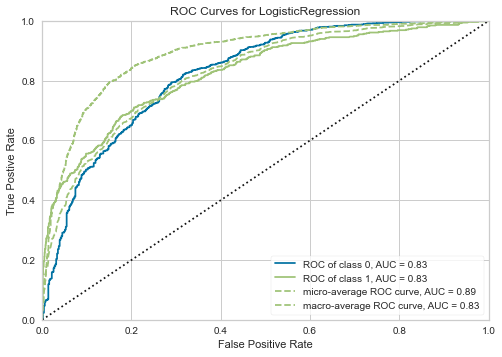

In [42]:
plot_model(lr)

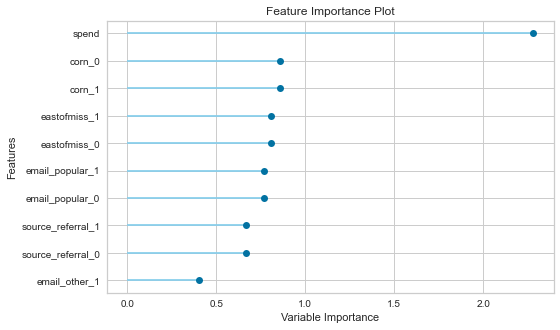

In [43]:
plot_model(lr, plot='feature')

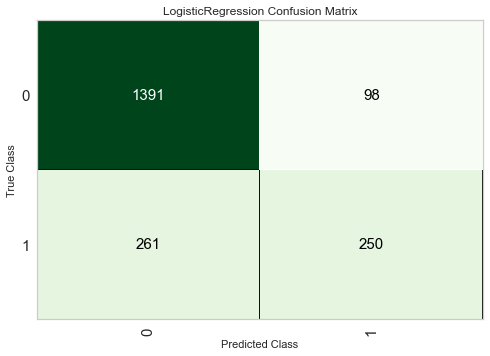

In [44]:
plot_model(lr, plot='confusion_matrix')

In [45]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [46]:
model = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [47]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [48]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 20, 
                           n_jobs=-1, scoring='accuracy')

In [49]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800,

In [50]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=6,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning rate=0.29, learning_rate=0.300000012, max_delta_step=0,
              max_depth=6, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=0.5, scale_pos_weight=1,
              subsample=0.7999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
randm.best_score_

0.8634999999999999

In [52]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'reg_lambda': 0.5,
 'reg_alpha': 0.5,
 'n_estimators': 200,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning rate': 0.29,
 'gamma': 6,
 'colsample_bytree': 0.7999999999999999}

In [53]:
xgbmodel = XGBClassifier(random_state=0, n_estimators=200, objective='binary:logistic',
                        subsample=0.8,min_child_weight=2,max_depth=6,learning_rate=0.29,
                        colsample_bytree = 0.8, reg_lambda=0.5, reg_alpha=0.5 )

In [54]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.16700
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.15500
[2]	validation_0-error:0.15600
[3]	validation_0-error:0.15500
[4]	validation_0-error:0.16750
[5]	validation_0-error:0.15100
[6]	validation_0-error:0.14750
[7]	validation_0-error:0.14100
[8]	validation_0-error:0.14000
[9]	validation_0-error:0.13250
[10]	validation_0-error:0.13200
[11]	validation_0-error:0.13050
[12]	validation_0-error:0.13050
[13]	validation_0-error:0.13450
[14]	validation_0-error:0.13500
[15]	validation_0-error:0.13550
[16]	validation_0-error:0.13650
[17]	validation_0-error:0.13600
[18]	validation_0-error:0.13550
[19]	validation_0-error:0.13450
[20]	validation_0-error:0.13650
[21]	validation_0-error:0.13700
Stopping. Best iteration:
[11]	validation_0-error:0.13050



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.5,
              reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_pred = xgbmodel.predict(X_test_scaled)

In [56]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### Model Evaluation

In [57]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1403,   88],
       [ 173,  336]], dtype=int64)

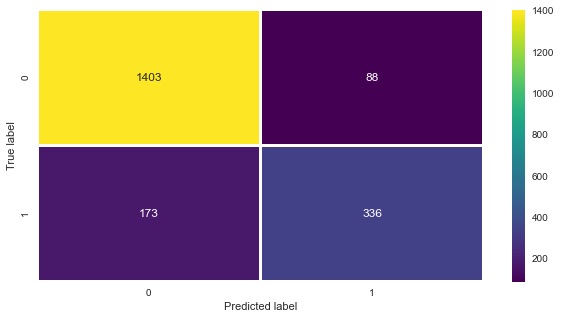

In [58]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1491
           1       0.79      0.66      0.72       509

    accuracy                           0.87      2000
   macro avg       0.84      0.80      0.82      2000
weighted avg       0.87      0.87      0.87      2000



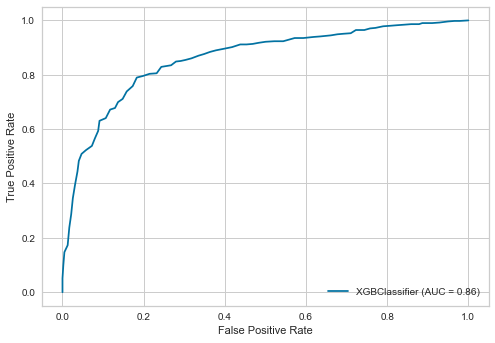

In [60]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [61]:
X.columns

Index(['spend', 'freeship', 'corn', 'eastofmiss', 'email_other', 'email_popular', 'source_referral', 'source_search'], dtype='object')

In [62]:
xgbmodel.get_booster().feature_names = ['spend', 'freeship', 'corn', 'eastofmiss', 'email_other', 'email_popular', 'source_referral', 'source_search']

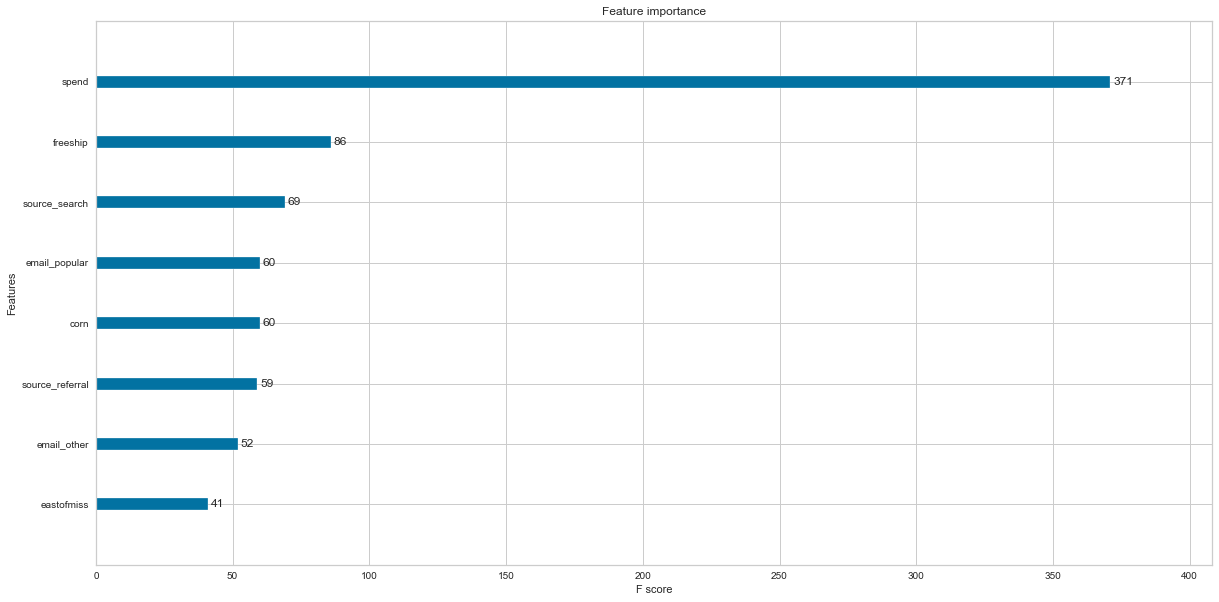

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [64]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


In [65]:
cv.mean()

0.8554999999999999

### Save the Model

In [66]:
filename = 'lobstermodel.sav'
dump(xgbmodel,open(filename,'wb'))

### Load the Model

In [67]:
loaded_model = load(open(filename,'rb'))

In [68]:
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.5,
              reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)